In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import treeswift
import csv
import Utils
import seaborn as sns
import statsmodels.api as sm

### Do NOT run the next two cells, they create the csv file again 

In [24]:
# Make csv file
file_path = "Analysis.csv"
header = ["Diameter Range", "Taxa Amount", "SP-Score"]

with open(file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)

In [25]:
# Get Data and append 
sub_list = "C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\100Taxa.Diam", "C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\100Taxa.Diam-2", "C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\200Taxa.Diam", "C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\200TaxaDiam-2", "C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\300TaxaDiam", "C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\300TaxaDiam-2"
"C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\200Taxa.Diam", 
"C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\200Taxa.Diam-2", 
"C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\300Taxa.Diam", 
"C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\300Taxa.Diam-2"


#"C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\100Taxa.Diam-2","C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\200Taxa.Diam", "C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\200Taxa.Diam-2", "C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\300Taxa.Diam", "C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\ClusterSubtrees\\subtree_info\\Subtrees\\300Taxa.Diam-2"


for folder in sub_list: 
    for i in range(100):
        tree_extension = folder + "\\Subtree" + str(i+1) + ".tree"
        SP_score_file = folder + "\\Subtree" + str(i+1) + ".mafft_accuracy"

        tree = treeswift.read_tree_newick(tree_extension)

        diam = tree.diameter()
        leaves = Utils.leaf_num(tree)

        with open(SP_score_file, "r") as file:
            SP_score = float(file.readline().split()[1])    

        row = [diam,leaves,SP_score]

         # Append the row to the CSV file
        with open(file_path, mode='a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(row)


### Makes dataframe

In [3]:
file_path= "C:\\Users\\Carola\\OneDrive\\BRIDGE2023\\Greedy Algorithm\Analysis.csv"
df = pd.read_csv(file_path)
df.sort_values(by='Diameter Range', ascending=True, inplace=True)
print(df)

     Diameter Range  Taxa Amount  SP-Score
176       1611.9461          100  0.513481
172       1612.2824          100  0.435730
108       1616.8810          100  0.525964
190       1617.2594          100  0.466584
125       1618.1255          100  0.533414
..              ...          ...       ...
408       3208.8758          300  0.006705
9         3208.8758          100  0.007219
431       3213.4187          300  0.005750
32        3213.4187          100  0.011365
231       3213.4187          200  0.012677

[600 rows x 3 columns]


### Subsets Dataframe 

In [4]:
# Subset by Diameter range 
subset_16_18 = df[(df['Diameter Range'] >= 1600) & (df['Diameter Range'] <= 1800)] # 300 cells
subset_18_20 = df[(df['Diameter Range'] >= 1800) & (df['Diameter Range'] <= 2000)] # 0 cells
subset_20_22 = df[(df['Diameter Range'] >= 2000) & (df['Diameter Range'] <= 2200)] # 0 cells
subset_22_24 = df[(df['Diameter Range'] >= 2200) & (df['Diameter Range'] <= 2400)] # 0 cells
subset_24_26 = df[(df['Diameter Range'] >= 2400) & (df['Diameter Range'] <= 2600)] # 5 cells
subset_26_28 = df[(df['Diameter Range'] >= 2600) & (df['Diameter Range'] <= 2800)] # 78 cells
subset_28_30 = df[(df['Diameter Range'] >= 2800) & (df['Diameter Range'] <= 3000)] # 154 cells
subset_30_32 = df[(df['Diameter Range'] >= 3000) & (df['Diameter Range'] <= 3200)] # 57 cells
subset_32_34 = df[(df['Diameter Range'] >= 3200) & (df['Diameter Range'] <= 3400)] # 6 cells

subset_24_34 = df[(df['Diameter Range'] >= 2400) & (df['Diameter Range'] <= 3400)] 



In [ ]:
# Subset by Taxa Amount 

# Subset DataFrame for Taxa Amount == 100
df_taxa_100 = df[df['Taxa Amount'] == 100]

# Subset DataFrame for Taxa Amount == 200
df_taxa_200 = df[df['Taxa Amount'] == 200]

# Subset DataFrame for Taxa Amount == 300
df_taxa_300 = df[df['Taxa Amount'] == 300]

### Plotting and Graphing

#### SP-Score Vs Diameter

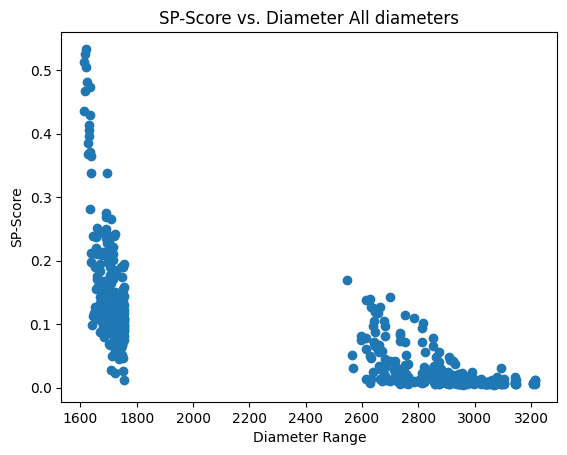

In [5]:
# Scatter plot: SP-Score (x-axis) vs. Diameter Range (y-axis)
plt.scatter(df['Diameter Range'], df['SP-Score'])

# Set axis labels and plot title
plt.xlabel('Diameter Range')
plt.ylabel('SP-Score')
plt.title('SP-Score vs. Diameter All diameters')

# Show the plot
plt.show()


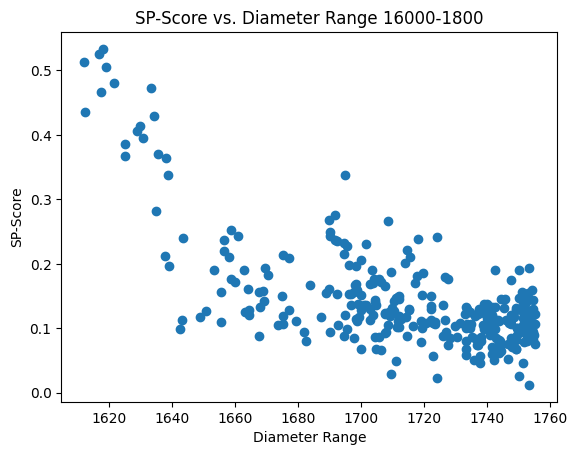

In [6]:
# Scatter plot: SP-Score (x-axis) vs. Diameter Range (y-axis)
plt.scatter(subset_16_18['Diameter Range'], subset_16_18['SP-Score'])

# Set axis labels and plot title
plt.xlabel('Diameter Range')
plt.ylabel('SP-Score')
plt.title('SP-Score vs. Diameter Range 16000-1800')

# Show the plot
plt.show()


##### It seems that as the diameter increases, the estimation error goes down. This is opposite of waht we thought might happen. Its also important to acknowledge that this diameter range in on the low end and is not representative of other diameter ranges and their eror estimation. So, when it comes to smaller diameters ranges, lower end of the range increases error and higher range decreases error. 

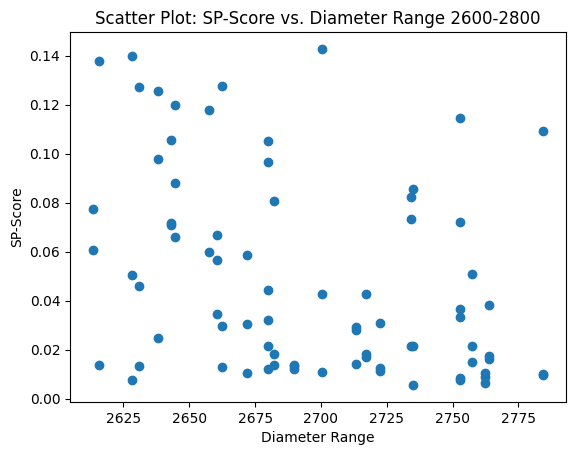

In [7]:
# Scatter plot: SP-Score (x-axis) vs. Diameter Range (y-axis)
plt.scatter(subset_26_28['Diameter Range'], subset_26_28['SP-Score'])

# Set axis labels and plot title
plt.xlabel('Diameter Range')
plt.ylabel('SP-Score')
plt.title('Scatter Plot: SP-Score vs. Diameter Range 2600-2800')

# Show the plot
plt.show()


##### For mid range diameters, there seems to be no correlation between the diameter range and error. Here we see that, increasing the diameter, once again, does not necessary increase error. Note , the highers error is also 0.14 which is a lot less than the 0.5 of the smaller diameter range. Seems that increasing the diameter does not neccesary increase error but can actually decrease it. This probably due to the fact that these trees not only have long diameters but also long branches in general. See how having lots of short branches affects SP-Score

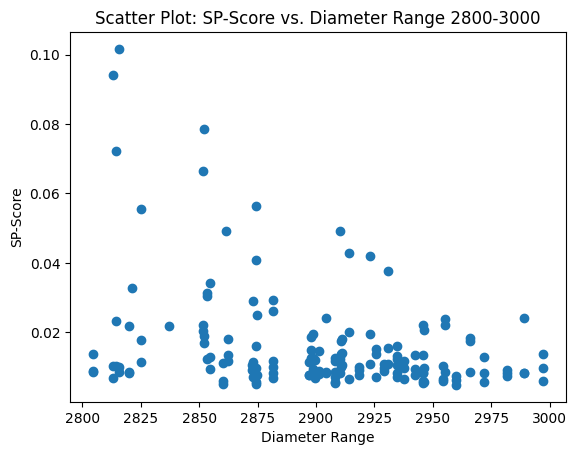

In [8]:
# Scatter plot: SP-Score (x-axis) vs. Diameter Range (y-axis)
plt.scatter(subset_28_30['Diameter Range'], subset_28_30['SP-Score'])

# Set axis labels and plot title
plt.xlabel('Diameter Range')
plt.ylabel('SP-Score')
plt.title('Scatter Plot: SP-Score vs. Diameter Range 2800-3000')

# Show the plot
plt.show()

##### This is the high range of diameters and once again we see that increasing the diameter actually correlates to lower SP-Score. Thinking about it, there arent a lot of subtrees with 300 taxa with large diameters. If we have a subtree with 340 and maximize its PD, we are still leaving a lot of small branche insider. I would expect to see that larger taxa trees have shorter branches. And expect that a lot short branches decrease accuracy. But we dont see that so...

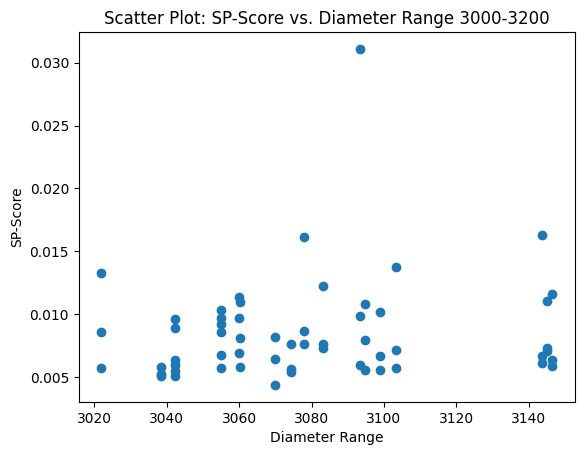

In [9]:
# Scatter plot: SP-Score (x-axis) vs. Diameter Range (y-axis)
plt.scatter(subset_30_32['Diameter Range'], subset_30_32['SP-Score'])

# Set axis labels and plot title
plt.xlabel('Diameter Range')
plt.ylabel('SP-Score')
plt.title('Scatter Plot: SP-Score vs. Diameter Range 3000-3200')

# Show the plot
plt.show()

##### This is the highest range in diameter. Perhaps if we had bigger diameters we could see that the accuracy platuoes after a certain amount of diameter. That would sort of proove our point. But for now, it seems that either a bigger diameter doesnt not affect the accuracy but improves it. We should make more trees with bigger diam, 3200-3400 and 3400-3600. And for each tree add the avg branch and min branch. To see if smaller branch averages and mind correlate to smaller SP-Score 

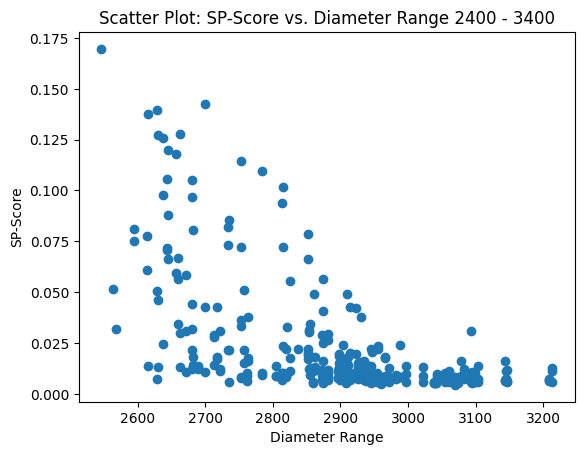

In [10]:
# Scatter plot: SP-Score (x-axis) vs. Diameter Range (y-axis)
plt.scatter(subset_24_34['Diameter Range'], subset_24_34['SP-Score'])

# Set axis labels and plot title
plt.xlabel('Diameter Range')
plt.ylabel('SP-Score')
plt.title('Scatter Plot: SP-Score vs. Diameter Range 2400 - 3400')

# Show the plot
plt.show()

##### I think its confirmed the general trend is the larger the diameter the smaller the error.

In [11]:
# Calculate correlation coefficients: 

#As the "Diameter Range" increases within this range, the "SP-Score" tends to decrease.
correlation_16_18 = subset_16_18['Diameter Range'].corr(subset_16_18['SP-Score']) 

# As the "Diameter Range" increases within this range, the "SP-Score" tends to decrease.
correlation_24_26 = subset_24_26['Diameter Range'].corr(subset_24_26['SP-Score'])

#As the "Diameter Range" increases within this range, the "SP-Score" tends to decrease, but the relationship is not very strong.
correlation_26_28 = subset_26_28['Diameter Range'].corr(subset_26_28['SP-Score'])

# As the "Diameter Range" increases within this range, the "SP-Score" tends to decrease, but the relationship is not very strong.
correlation_28_30 = subset_28_30['Diameter Range'].corr(subset_28_30['SP-Score'])

#As the "Diameter Range" increases within this range, the "SP-Score" tends to increase slightly, but the relationship is almost negligible.
correlation_30_32 = subset_30_32['Diameter Range'].corr(subset_30_32['SP-Score'])

#As the "Diameter Range" increases from 32 to 34, the "SP-Score" tends to increase, and the relationship between the two variables is moderately strong and positive.
correlation_32_34 = subset_32_34['Diameter Range'].corr(subset_32_34['SP-Score'])

# As the "Diameter Range" increases within this wider range, the "SP-Score" tends to decrease.
correlation_24_34 = subset_24_34['Diameter Range'].corr(subset_24_34['SP-Score'])

# This correlation coefficient suggests that as the "Diameter Range" increases, the "SP-Score" tends to decrease, and this relationship is significantly strong and negative.
correlation_all = df['Diameter Range'].corr(df['SP-Score'])

print(f"Correlation Coefficient 16-18: {correlation_16_18}")
print(f"Correlation Coefficient 24-26: {correlation_24_26}")
print(f"Correlation Coefficient 26-28: {correlation_26_28}")

print(f"Correlation Coefficient 28-30: {correlation_28_30}")
print(f"Correlation Coefficient 30-32: {correlation_30_32}")
print(f"Correlation Coefficient 32-34: {correlation_32_34}")

print(f"Correlation Coefficient 24-34: {correlation_24_34}")

print(f"Correlation Coefficient all: {correlation_all}")



Correlation Coefficient 16-18: -0.6997779385787053
Correlation Coefficient 24-26: -0.4428295887701721
Correlation Coefficient 26-28: -0.38040475102687793
Correlation Coefficient 28-30: -0.343301395246619
Correlation Coefficient 30-32: 0.12856093681950925
Correlation Coefficient 32-34: 0.6019668480055872
Correlation Coefficient 24-34: -0.5809375114628224
Correlation Coefficient all: -0.7153936858703381


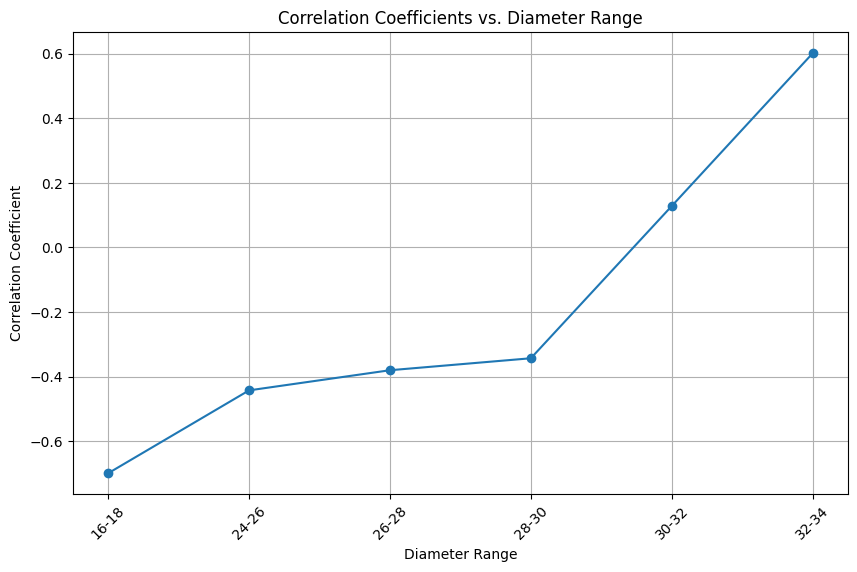

In [13]:
# Plotting Correlation data

correlation_data = {
    'Diameter Range': ['16-18', '24-26', '26-28', '28-30', '30-32', '32-34'],
    'Correlation Coefficient': [-0.6997779385787053, -0.4428295887701721, -0.38040475102687793,
                                -0.343301395246619, 0.12856093681950925, 0.6019668480055872]}

correlation_df = pd.DataFrame(correlation_data)

# Plot the correlations
plt.figure(figsize=(10, 6))
plt.plot(correlation_df['Diameter Range'], correlation_df['Correlation Coefficient'], marker='o', linestyle='-')
plt.xlabel('Diameter Range')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients vs. Diameter Range')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

##### A negative correlation signifies that as the Diameter increases the error decreases. That seems to be true right until the last range category, where it could be a lack of data or the error plateous after a certan diameter range. To Answer this question, we need 2-3, more diameter categories. 

                            OLS Regression Results                            
Dep. Variable:               SP-Score   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     626.9
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           3.57e-95
Time:                        13:43:38   Log-Likelihood:                 813.10
No. Observations:                 600   AIC:                            -1622.
Df Residuals:                     598   BIC:                            -1613.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3319      0.010     32.

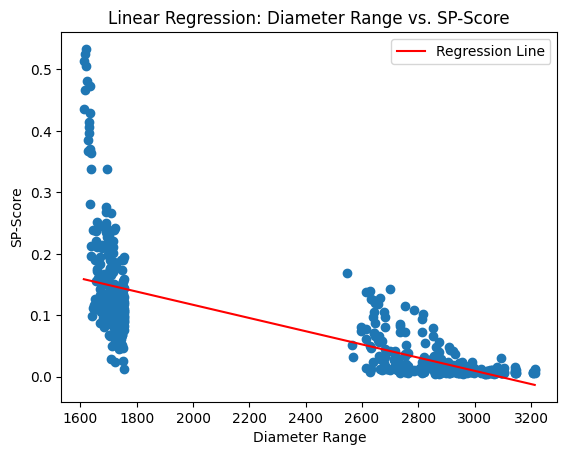

In [74]:
# Define the independent variable (X) and the dependent variable (y)
X = df['Diameter Range']
y = df['SP-Score']

# Add a constant term to the independent variable (X) to include an intercept in the regression model
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

# Plot the regression line
plt.scatter(df['Diameter Range'], df['SP-Score'])
plt.plot(df['Diameter Range'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Diameter Range')
plt.ylabel('SP-Score')
plt.title('Linear Regression: Diameter Range vs. SP-Score')
plt.legend()
plt.show()

##### The regressional analysis just proves that there is a strong negative correlation between Diameter and SP-score. 

In [95]:

# Correlation coefficients and diameter ranges
correlation_coefficients = [-0.6997779385787053, -0.4428295887701721, -0.38040475102687793, -0.343301395246619, 0.12856093681950925, 0.6019668480055872, -0.5809375114628224]
diameter_ranges = ['16-18', '24-26', '26-28', '28-30', '30-32', '32-34']

# Create a DataFrame to store the data
data = pd.DataFrame({'Diameter Range': diameter_ranges, 'Correlation Coefficient': correlation_coefficients})

print(data)


  Diameter Range  Correlation Coefficient
0          16-18                -0.699778
1          24-26                -0.442830
2          26-28                -0.380405
3          28-30                -0.343301
4          30-32                 0.128561
5          32-34                 0.601967
6          24-34                -0.580938


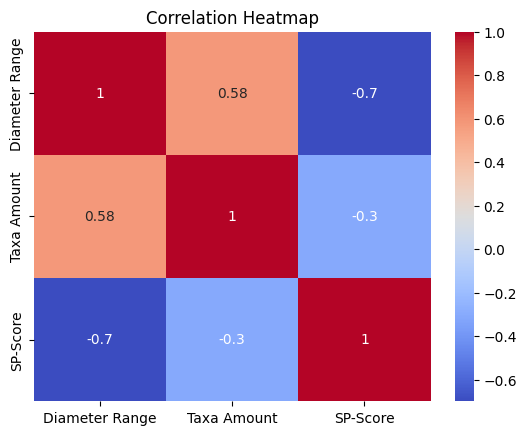

In [30]:

# If you haven't read the CSV yet, read it into the DataFrame using pd.read_csv()

# Compute the correlation matrix
correlation_matrix = subset_16_18.corr()

# Create the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Customize the plot (optional)
plt.title("Correlation Heatmap")
plt.show()